# importing Data set and Data preparation through Data Generator

In [19]:

TrainingImagePath='C:\\Users\\SHYAM\\face_data_\\train'
 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
 

test_datagen = ImageDataGenerator()
 
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
 
TestingImagePath='C:\\Users\\SHYAM\\face_data_\\val'
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
 
# Printing class labels for each face
test_set.class_indices

Found 451 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


{'ben_afflek': 0,
 'elton_john': 1,
 'jerry_seinfeld': 2,
 'madonna': 3,
 'mindy_kaling': 4}

# calculating number of class present in image to make it as an output neuron

In [20]:

TrainClasses=training_set.class_indices
 

ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName


print("Mapping of Face and its ID",ResultMap)
 

OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'ben_afflek', 1: 'elton_john', 2: 'jerry_seinfeld', 3: 'madonna', 4: 'mindy_kaling'}

 The Number of output neurons:  5


#  extracting import feauters using CNN

In [21]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
 

classifier= Sequential()
 

classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(OutputNeurons, activation='softmax'))
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])
 
###########################################################
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Starting the model training
classifier.fit(
                    training_set,
                    epochs=40,
                    validation_data=test_set,
                    validation_steps=6)
 
EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')



Epoch 1/40
15/15 [==============================] - 13s 789ms/step - loss: 44.9420 - accuracy: 0.2616 - val_loss: 1.5590 - val_accuracy: 0.1600
Epoch 2/40
15/15 [==============================] - 11s 741ms/step - loss: 1.5531 - accuracy: 0.2661
Epoch 3/40
15/15 [==============================] - 11s 702ms/step - loss: 1.4739 - accuracy: 0.3171
Epoch 4/40
15/15 [==============================] - 11s 692ms/step - loss: 1.4011 - accuracy: 0.3947
Epoch 5/40
15/15 [==============================] - 11s 701ms/step - loss: 1.3489 - accuracy: 0.4257
Epoch 6/40
15/15 [==============================] - 11s 718ms/step - loss: 1.3049 - accuracy: 0.4900
Epoch 7/40
15/15 [==============================] - 11s 710ms/step - loss: 1.2318 - accuracy: 0.5455
Epoch 8/40
15/15 [==============================] - 11s 703ms/step - loss: 1.0607 - accuracy: 0.6075
Epoch 9/40
15/15 [==============================] - 11s 714ms/step - loss: 1.0227 - accuracy: 0.6142
Epoch 10/40
15/15 [=============================

In [22]:
import os

# Making  predictions '''

In [23]:


import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

ImagePath='C:\\Users\\SHYAM\\face_data_\\test'
dir_list = os.listdir(ImagePath)
level=-1
level_img=[]
predicted_lev=[]
for i in dir_list:
    newpath=ImagePath+"\\"+i
    new_dir=os.listdir(newpath)
    level+=1
    new_dir
    
    for j in new_dir:
        level_img.append(level)
        Impath=newpath+"\\"+j
        test_image=load_img(Impath,target_size=(64, 64))
        test_image=img_to_array(test_image)
 
        test_image=np.expand_dims(test_image,axis=0)
 
        result=classifier.predict(test_image,verbose=0)
        predicted_lev.append(np.argmax(result))

 

 
print('Prediction is: ',predicted_lev)
    

print('original is: ',level_img)


    

Prediction is:  [0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 1, 1, 1, 1, 1, 4, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4]
original is:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [24]:
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,classification_report
  
accuracy_score(predicted_lev,level_img)

0.6862745098039216

In [25]:
import seaborn as sn


In [26]:
print(classification_report(level_img,predicted_lev))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.55      0.60      0.57        10
           2       0.88      0.70      0.78        10
           3       0.38      0.50      0.43        10
           4       0.90      0.90      0.90        10

    accuracy                           0.69        51
   macro avg       0.72      0.69      0.70        51
weighted avg       0.72      0.69      0.70        51



Text(50.722222222222214, 0.5, 'Truth')

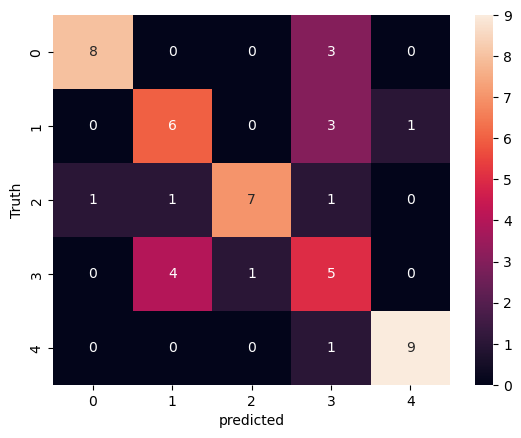

In [27]:
import matplotlib.pyplot as plt
cf=confusion_matrix(level_img,predicted_lev)
sn.heatmap(cf,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")